# Task: Customer Preference Analysis

Analyze the relationship between the type of
cuisine and the restaurant's rating.

Identify the most popular cuisines among
customers based on the number of votes.

Determine if there are any specific cuisines
that tend to receive higher ratings.

# Step 1: 
   Load the dataset

In [1]:
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\Dataset_cleaned .csv")

# Display first few rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Explanation: We’re loading dataset using pandas to explore and analyze the data.

# Step 2: 
   Check relevant columns

In [2]:
# Check column names and data types
df.info()

# Optional: Check for null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Explanation: We want to make sure to know which columns contain:

Cuisine types

Ratings

Votes

# Step 3: 
   Preprocess Cuisines Column

In [3]:
# Example: View top unique cuisines
df['Cuisines'].value_counts().head(10)

# Create a new DataFrame where each cuisine has its own row
df_cuisine = df.copy()
df_cuisine['Cuisines'] = df_cuisine['Cuisines'].astype(str)

# Split multiple cuisines into separate rows
df_cuisine = df_cuisine.assign(Cuisines=df_cuisine['Cuisines'].str.split(', ')).explode('Cuisines')

df_cuisine.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Desserts,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,Seafood,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


Explanation: This step is important to analyze cuisines individually, even when multiple are listed in one row.



# Step 4: 
   Cuisine vs Rating (Average Rating by Cuisine)

In [4]:
# Average rating for each cuisine
avg_rating = df_cuisine.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Display top cuisines by rating
avg_rating.head(10)

Cuisines
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
D�_ner        4.400000
Bubble Tea    4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64

Explanation: This shows which cuisines generally receive higher ratings.

# Step 5: 
   Popularity based on Votes

In [5]:
# Total votes for each cuisine
votes_per_cuisine = df_cuisine.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

# Display top popular cuisines
votes_per_cuisine.head(10)

Cuisines
North Indian    598707
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64

Explanation: We sum votes to find the most popular cuisines.



# Step 6: 
   Visualize the Insights

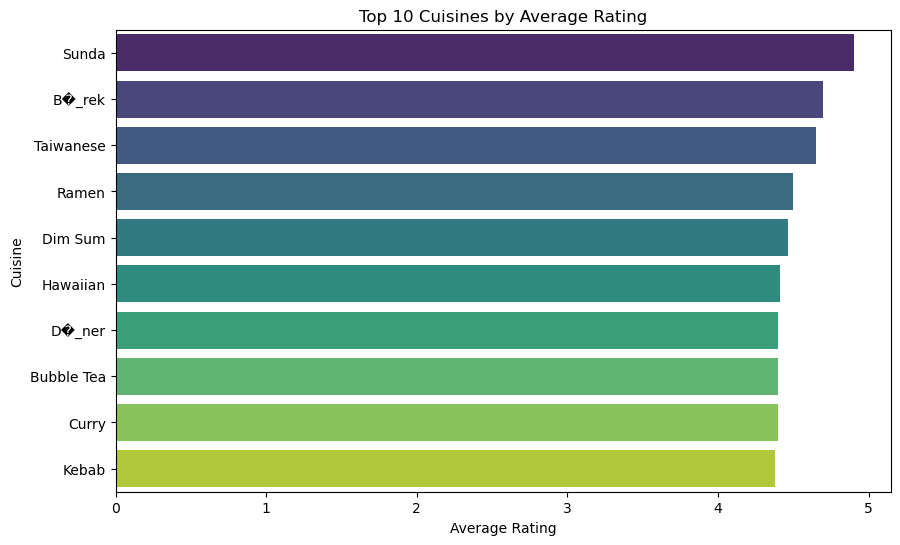

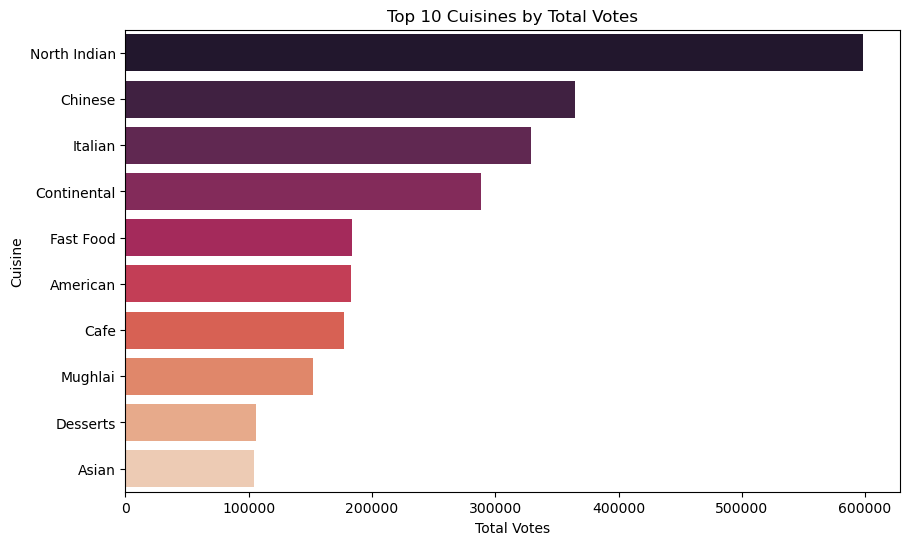

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 cuisines by average rating
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating.head(10).values, y=avg_rating.head(10).index, palette='viridis')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

# Plot top 10 cuisines by total votes
plt.figure(figsize=(10,6))
sns.barplot(x=votes_per_cuisine.head(10).values, y=votes_per_cuisine.head(10).index, palette='rocket')
plt.title('Top 10 Cuisines by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.show()

# Step 7: 
   Combine Rating and Popularity

In [7]:
# Combine both insights into a single DataFrame
combined = pd.DataFrame({
    'Average Rating': avg_rating,
    'Total Votes': votes_per_cuisine
})

# Drop NaNs (in case some cuisines exist in only one category)
combined = combined.dropna()

# Show cuisines with high rating and high votes
combined.sort_values(by=['Average Rating', 'Total Votes'], ascending=False).head(10)


,Average Rating,Total Votes
Cuisines,,
Sunda,4.900000,5514
B�_rek,4.700000,1305
Taiwanese,4.650000,384
Ramen,4.500000,1259
Dim Sum,4.466667,1755
Hawaiian,4.412500,8012
Bubble Tea,4.400000,659
D�_ner,4.400000,72
Curry,4.400000,2059


 Explanation: This helps us see which cuisines are both popular and well-rated.

# ✅ Summary

Analyze cuisine vs rating
→ Use avg_rating: This gives the average rating for each cuisine.

Identify most popular cuisines
→ Use votes_per_cuisine: This gives the total number of votes for each cuisine (indicating popularity).

Cuisines that receive higher ratings
→ Use sorted avg_rating (descending) or the combined DataFrame which contains both average rating and total votes for deeper insights.
